In [1]:
using Plots
#using Dierckx # not supported by CoCalc

In [2]:
function polybas(kmin,kmax,Np,kgrid)
    
    # Np: 多項式の次数-1
    # Ng: グリッドの数
    Ng = size(kgrid,1)
    x = (2/(kmax-kmin))*(kgrid .- kmin) .- 1
    
    # 基底関数の行列(NgxNp)を再帰的に求める
    T = zeros(Ng,Np)
    T0 = ones(Ng)
    T1 = x
    T2 = 2*x.*T1 - T0
    T[:,1] = T1
    T[:,2] = T2
    
    for i=3:Np-1
        T[:,i] = 2*x.*T[:,i-1] - T[:,i-2] 
    end
    
    T = [T0 T[:,1:(Np-1)]]
    
    return T
    
end

polybas (generic function with 1 method)

In [14]:
function polygrid(kmin,kmax,N)
    
#     temp = collect(LinRange(0,N-1,N))
#     x = -cos.((pi/(N-1))*temp) # チェビシェフ極値点
    temp = collect(LinRange(1,N-1,N-1))
    x = [0; -cos.((pi/2/(N-1))*(2*temp .- 1))] # チェビシェフゼロ点
    
    # xからkに変換
    k = 0.5*(kmax-kmin)*(x .+ 1) .+ kmin
   
    return k
    
end

polygrid (generic function with 1 method)

In [15]:
function f(x0)
    
    nx = size(x0,1)
    f0 = 1 ./ (1 .+ 25*x0.^2)
    
    return f0
    
end

f (generic function with 1 method)

In [16]:
# データ点
xmin = -1
xmax = 1
nxd = 11
xd = collect(LinRange(xmin, xmax, nxd))
yd = f(xd)

# 関数による値
nx = 1001
x0 = collect(LinRange(xmin, xmax, nx))
y0 = f(x0);

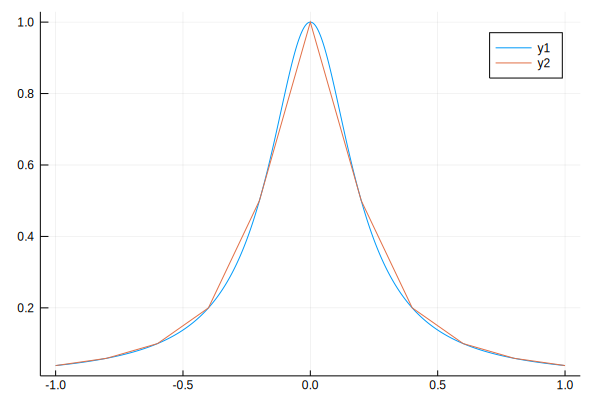

In [17]:
plot(x0,y0)
plot!(xd,yd)

In [18]:
## Julia関数(Spline1D)を使った線形補間による近似
#y1interp = Spline1D(xd, yd, k = 1, bc = "extrapolate")
x1 = collect(LinRange(xmin, xmax, nx))
#y1 = y1interp(x1);

In [19]:
## 通常の多項式による近似
Xd = ones(nxd,nxd)
X2 = ones(nx,nxd)
x2 = x1
for i=1:nxd-1
    Xd[:,i+1] = xd.^i
    X2[:,i+1] = x2.^i
end

b = (Xd'*Xd)\(Xd'*yd)
y2 = X2*b;

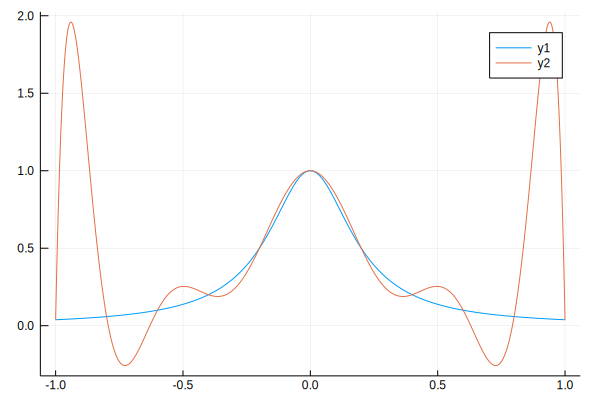

In [20]:
plot(x0,y0)
#plot!(x1,y1)
plot!(x2,y2)

In [21]:
# チェビシェフ多項式による近似
# N=11
nxd = 11
xcheb = polygrid(xmin,xmax,nxd)
ycheb = f(xcheb)
T = polybas(xmin,xmax,nxd,xcheb)
theta = T\ycheb

x3 = x1
T3 = polybas(xmin,xmax,nxd,x3)
y3 = T3*theta;

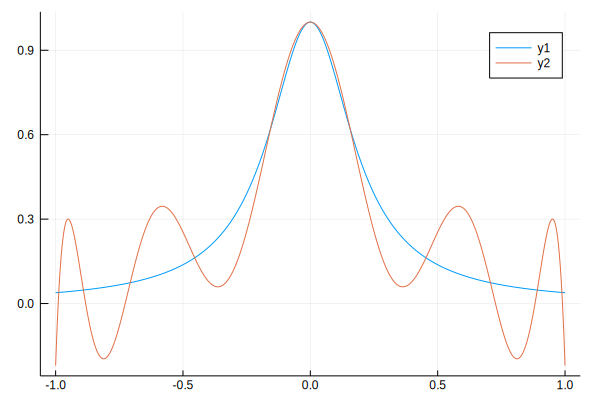

In [22]:
plot(x0,y0)
plot!(x3,y3)

In [23]:
# チェビシェフ多項式による近似
# N=21
nxd = 21
xcheb = polygrid(xmin,xmax,nxd)
ycheb = f(xcheb)
T = polybas(xmin,xmax,nxd,xcheb)
theta = T\ycheb

x3 = x1
T3 = polybas(xmin,xmax,nxd,x3)
y3 = T3*theta;

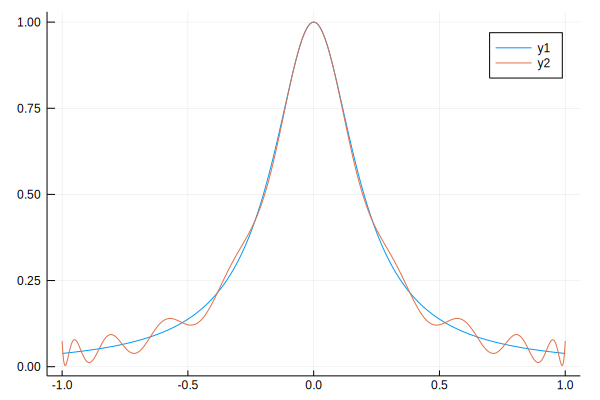

In [24]:
plot(x0,y0)
plot!(x3,y3)